## Importing data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
variable_description=pd.read_csv('Variable_Description.csv')

In [31]:
#Discarding useless columns
print("Here are all columns with Description")
variable_description.style.set_properties(subset=['Description'],**{'width':'700px'})
#variable_description

Here are all columns with Description


In [32]:
#Train datasize-
train.shape

(10714, 28)

In [33]:
#Based on intuition sense i think following columns can be best canditate for predictor variables:
column_to_be_included=['Region','Gender','Married','Children','Occupation','Mode_transport','cases/1M','Deaths/1M','comorbidity','Age','Coma score','Pulmonary score','cardiological pressure','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Blood Glucose','FT/month']

In [34]:
#Creating dataset based on essential variables
X_train=train[column_to_be_included]
X_test=test[column_to_be_included]
test_id=test['people_ID']
Y_train=train['Infect_Prob']

In [35]:
#Peek at the training data
X_train.head()

Region  Gender Married  Children     Occupation Mode_transport  \
0  Bhubaneshwar  Female     YES       1.0         Farmer         Public   
1  Bhubaneshwar  Female     YES       2.0         Farmer           Walk   
2  Bhubaneshwar  Female      NO       1.0        Cleaner         Public   
3  Bhubaneshwar  Female     YES       1.0         Driver            Car   
4  Bhubaneshwar  Female      NO       2.0  Manufacturing            Car   

   cases/1M  Deaths/1M             comorbidity  Age  ...  Pulmonary score  \
0         2          0            Hypertension   68  ...             <400   
1         2          0                Diabetes   64  ...             <100   
2         2          0                    None   19  ...             <300   
3         2          0  Coronary Heart Disease   33  ...             <200   
4         2          0                Diabetes   23  ...             <400   

  cardiological pressure Platelets    HBB  d-dimer  Heart rate  \
0                 Normal     154.0   93.0    233.0        82.0   
1               Stage-02     121.0   56.0    328.0        89.0   
2               Elevated     124.0  137.0    213.0        77.0   
3               Stage-01      98.0  167.0    275.0        64.0   
4                 Normal      21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose  FT/month  
0             58.0              27              7       2.0  
1             68.0               5              6       1.0  
2             43.0              40              6       1.0  
3             60.0              27              7       1.0  
4             64.0              32              7       1.0  

[5 rows x 21 columns]

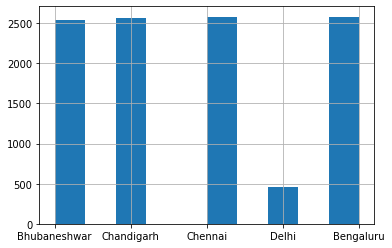

In [36]:
X_train['Region'].hist()

This clearly suggests No. of cases are relatively more in other cities (Bhubaneshwar, Chandigarh, Chennai and Bengaluru) as compared to Delhi.

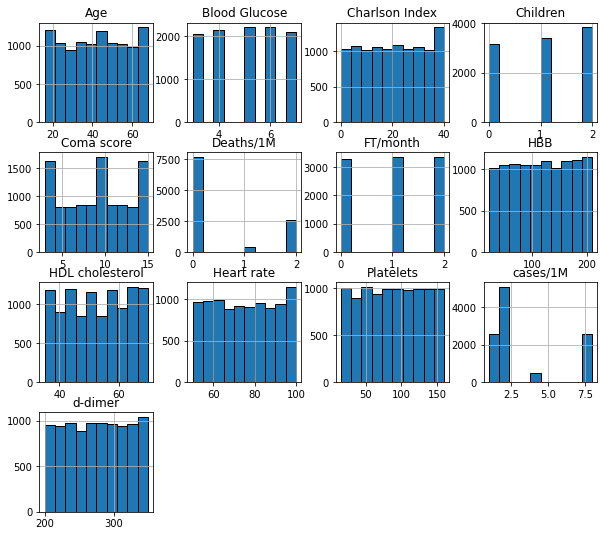

In [37]:
#Checking histogram for all other cities
X_train.hist(figsize=(10,9),ec='k')
plt.show()

Text(0.5, 1.0, 'cardiological pressure')

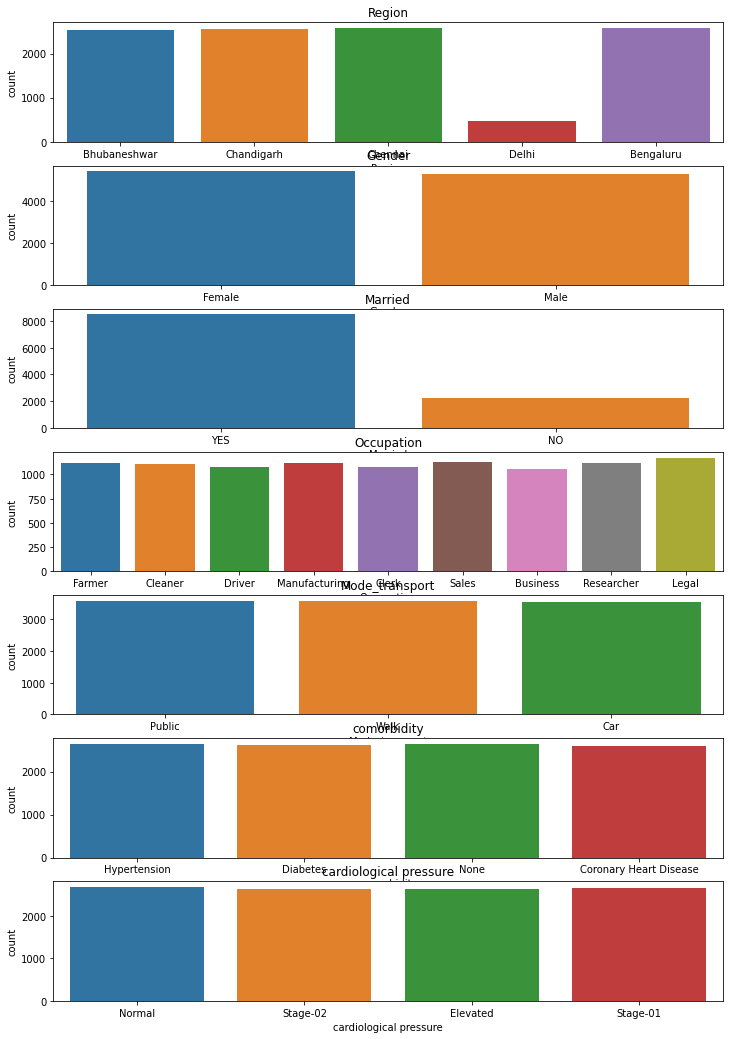

In [38]:
#Exploring categorical columns
import seaborn as sns
f,ax=plt.subplots(7,figsize=(12,18))
sns.countplot('Region',data=X_train,ax=ax[0])
sns.countplot('Gender',data=X_train,ax=ax[1])
sns.countplot('Married',data=X_train,ax=ax[2])
sns.countplot('Occupation',data=X_train,ax=ax[3])
sns.countplot('Mode_transport',data=X_train,ax=ax[4])
sns.countplot('comorbidity',data=X_train,ax=ax[5])
#sns.countplot('Married',data=X_train,ax=ax[6])
sns.countplot('cardiological pressure',data=X_train,ax=ax[6])
ax[0].set_title('Region')
ax[1].set_title('Gender')
ax[2].set_title('Married')
ax[3].set_title('Occupation')
ax[4].set_title('Mode_transport')
ax[5].set_title('comorbidity')
ax[6].set_title('cardiological pressure')

## Scatter plots

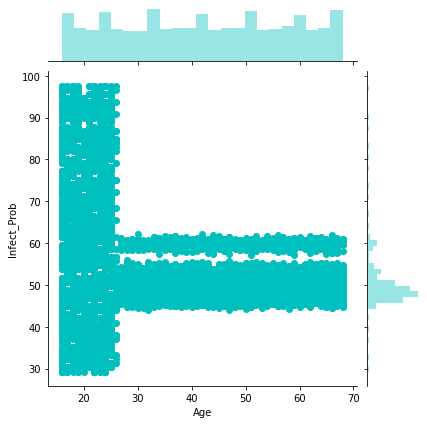

In [39]:
sns.jointplot(x='Age',y='Infect_Prob',data=train,color='c')
plt.show()

## Conclusion
1. Primarily most of the data suggests that people is age group of 15-25 have higher probablity of getting infected.
2. Although 15-25 age group has high probablity but more data is available for probablity values of 40-60 % which includes all people with ages ranging from 15-75.

In [40]:
#Features having positive correlation with target variable
print('Total number of features having positive correlation with infection probablity')
train_corr=train.corr()['Infect_Prob']
train_corr_ind=train_corr[train_corr>0.0].sort_values(ascending=False).index.tolist()
print("Count: {}".format(len(train_corr)))
print("Values:")
train_corr[train_corr_ind]

Total number of features having positive correlation with infection probablity
Count: 18
Values:


Infect_Prob        1.000000
Children           0.226795
Deaths/1M          0.174994
cases/1M           0.172871
people_ID          0.079361
Platelets          0.066727
Coma score         0.038400
d-dimer            0.021304
HBB                0.019361
HDL cholesterol    0.013288
Insurance          0.009996
Diuresis           0.006887
Name: Infect_Prob, dtype: float64

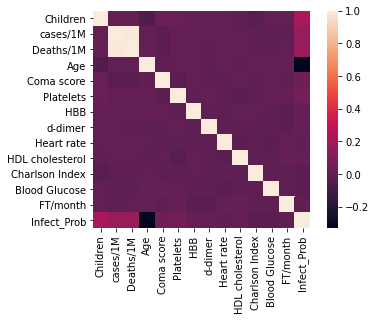

In [41]:
revised_train=pd.concat([X_train,Y_train],axis=1)
#Checking for positive correlation
sns.heatmap(revised_train.corr(),vmax=1.0,square=True)

## Conlusion:
    1. Children, cases/1M and Deaths/1M are reasonably correlated with infection probablity (target variable).
    2. As expected cases/1M and deaths/1M are almost completely correlated.

In [42]:
missing_values=revised_train.isnull().sum()

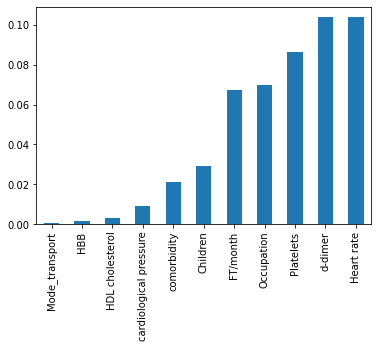

In [43]:
missing_values=missing_values[missing_values>0]/train.shape[0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()

## Conclusion:
Since atmost 10% data is missing in features like Heart rate, it is better to impute values instead of dropping the whole feature

In [44]:
#Imputing values in numerical columns
num_cols=['Heart rate','d-dimer','Platelets','FT/month','Children','HDL cholesterol','HBB']
for col in num_cols:
    null_index_train=X_train[X_train[col].isnull()].index.to_list()
    null_index_test=X_test[X_test[col].isnull()].index.to_list()
    X_train[col][null_index_train]=X_train[col].median()
    X_test[col][null_index_test]=X_train[col].median()

/home/kartik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kartik/.local/lib/python3.6/site-packages/pandas/core/series.py:1092: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/home/kartik/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns,

In [55]:
#Imputing values in categorical columns
count=X_train['Occupation'].value_counts()
count=count/count.sum()
print(count)
print('Deviation in relative counts of each occupation: {}'.format(count.std()))

Legal            0.117789
Sales            0.113474
Manufacturing    0.112371
Researcher       0.111869
Farmer           0.111669
Cleaner          0.111468
Clerk            0.108157
Driver           0.107555
Business         0.105649
Name: Occupation, dtype: float64
Deviation in relative counts of each occupation: 0.0036053329715068335


In [58]:
#Above results suggests that all occupations are uniformly distributed and hence we should create a new category of null occupation
X_train=pd.get_dummies(X_train,columns=['Occupation'],dummy_na=True)
X_test=pd.get_dummies(X_test,columns=['Occupation'],dummy_na=True)

In [59]:
#Checking for comorbidity


(10714, 30)

In [ ]:
#Imputing values in categorical columns
cat_cols=['Occupation','comorbidity','cardiological pressure','Mode_transport']

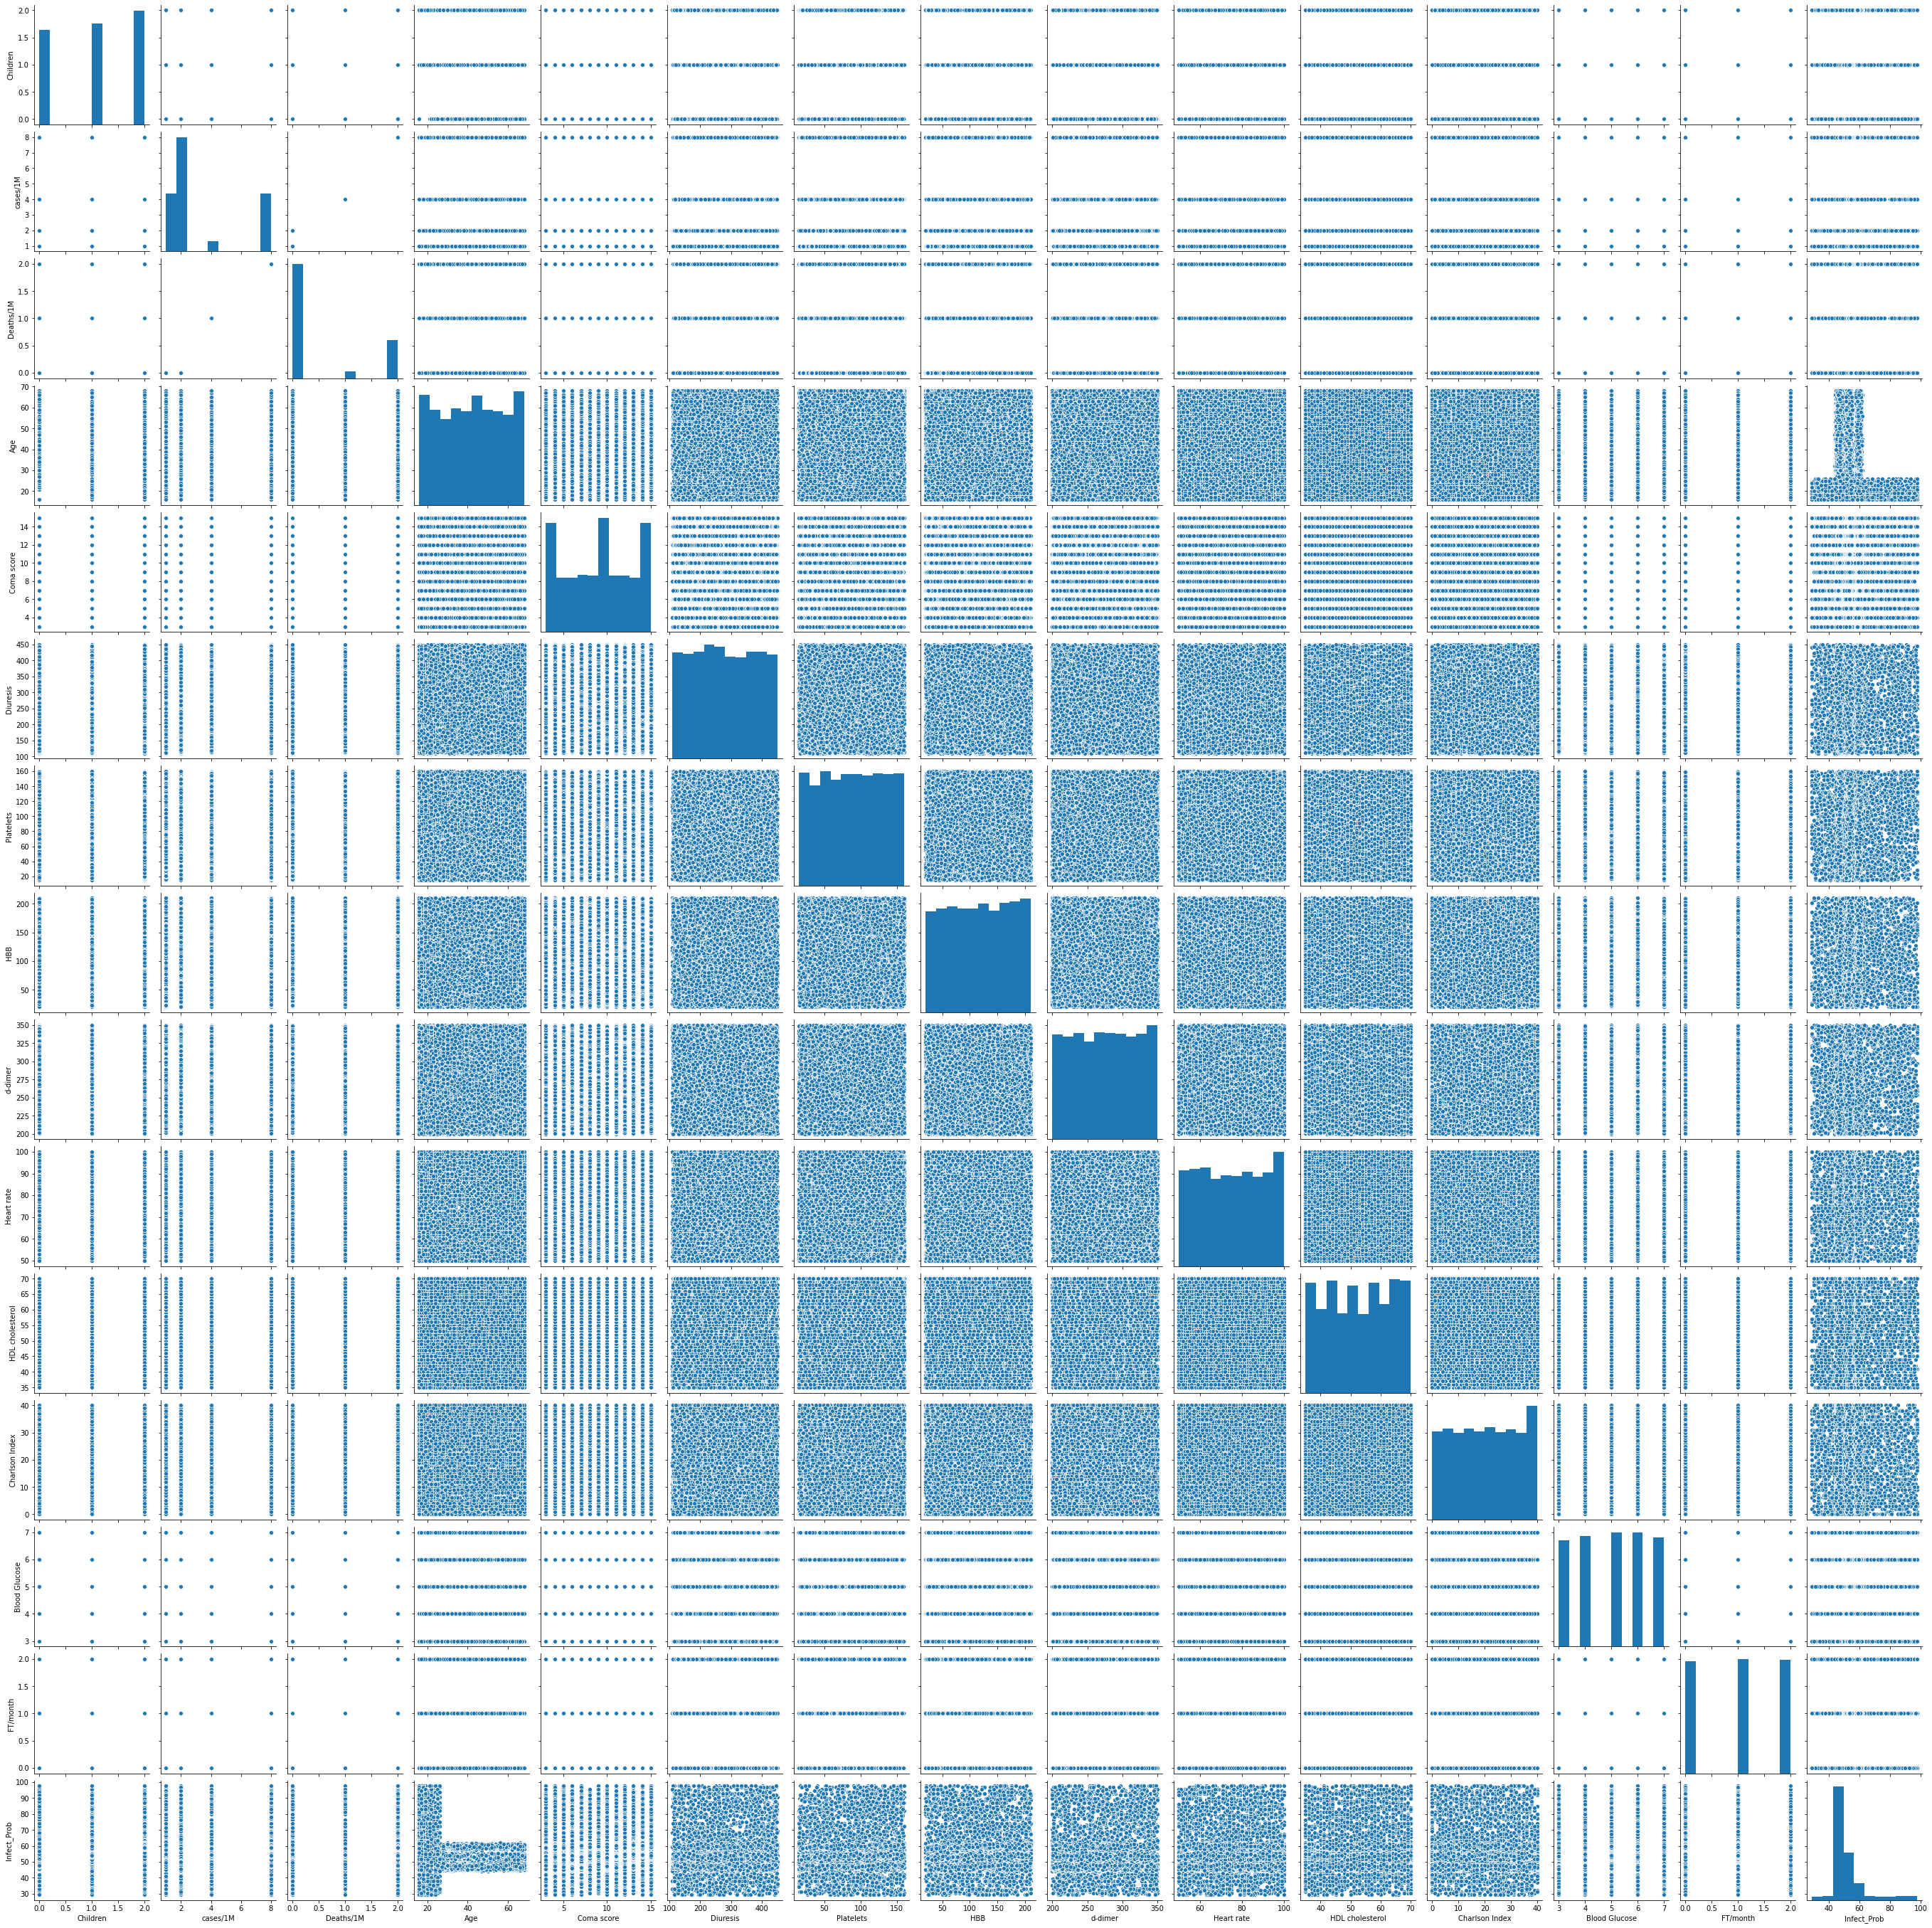

In [15]:
#Scatter plot for the whole data
sns.pairplot(revised_train)
plt.show()

In [17]:
X_train.describe()

Children      cases/1M     Deaths/1M           Age    Coma score  \
count  10403.000000  10714.000000  10714.000000  10714.000000  10714.000000   
mean       1.062770      3.285888      0.523241     42.083722      9.013067   
std        0.818222      2.721274      0.854303     15.323397      3.714970   
min        0.000000      1.000000      0.000000     16.000000      3.000000   
25%        0.000000      2.000000      0.000000     29.000000      6.000000   
50%        1.000000      2.000000      0.000000     42.000000      9.000000   
75%        2.000000      4.000000      1.000000     55.000000     12.000000   
max        2.000000      8.000000      2.000000     68.000000     15.000000   

          Diuresis    Platelets           HBB      d-dimer   Heart rate  \
count  9998.000000  9790.000000  10698.000000  9600.000000  9600.000000   
mean    278.806261    87.795812    116.170967   275.292292    74.847396   
std      97.985526    41.851103     55.178811    43.669692    14.869104   
min     110.000000    15.000000     20.000000   200.000000    50.000000   
25%     194.000000    52.000000     68.000000   237.000000    62.000000   
50%     276.000000    88.000000    117.000000   276.000000    75.000000   
75%     364.000000   124.000000    165.000000   313.000000    88.000000   
max     450.000000   160.000000    210.000000   350.000000   100.000000   

       HDL cholesterol  Charlson Index  Blood Glucose     FT/month  
count     10679.000000    10714.000000   10714.000000  9991.000000  
mean         52.632737       20.028094       5.015027     1.004604  
std          10.434293       11.828445       1.399770     0.815257  
min          35.000000        0.000000       3.000000     0.000000  
25%          44.000000       10.000000       4.000000     0.000000  
50%          53.000000       20.000000       5.000000     1.000000  
75%          62.000000       30.000000       6.000000     2.000000  
max          70.000000       40.000000       7.000000     2.000000